In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

CSV file loaded successfully!


CSV file loaded successfully!


<function matplotlib.pyplot.show(close=None, block=None)>

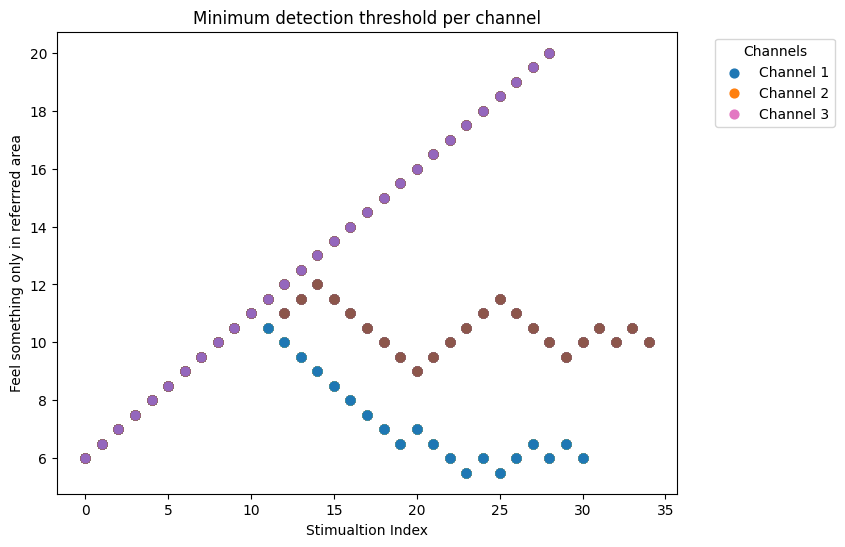

In [ ]:
csv_file = 'recorded_data\\Habib_testing_setup\\2024-11-28_09-59-33_PA_variable.csv'  # Replace with your CSV file name
try:
    data = pd.read_csv(csv_file)
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print(f"File {csv_file} not found.")
    exit()

plt.figure(figsize=(8, 6))

grouped_data = data.groupby('currentChannel')
 
for channel, group in grouped_data:
    
    channel_data = data[data['currentChannel'] == channel]

    
    for idx, row in channel_data.iterrows():
        plt.scatter(group['#'], group['demand'], marker='o', s= 40, label=f'Channel {channel}' if idx == channel_data.index[0] else "")

#plt.plot(group['#'], group['demand'], marker=markers, label=f'Channel {channel}')
plt.xlabel('Stimualtion Index')
plt.ylabel('Feel something only in referrred area')
plt.title(f'Minimum detection threshold per channel')
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show


ValueError: x and y must be the same size

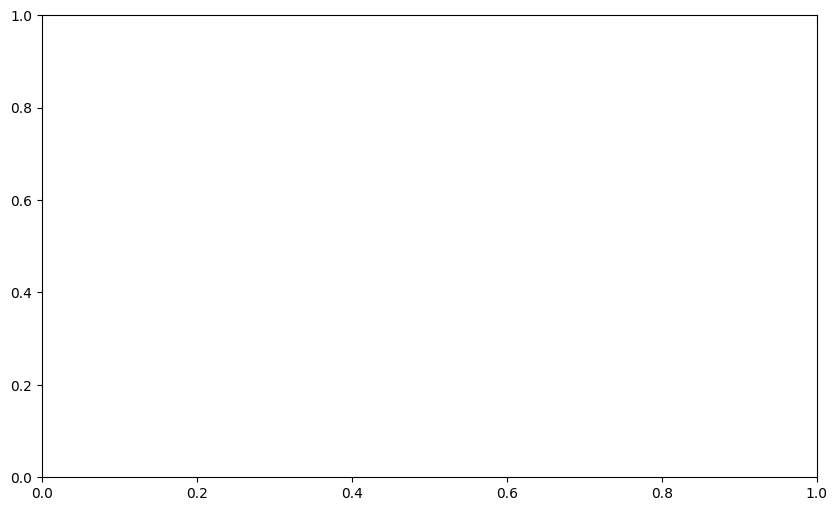

In [39]:
# Step 3: Create a plot
plt.figure(figsize=(10, 6))

# Assign unique colors to each channel
unique_channels = data['currentChannel'].unique()
colors = plt.cm.tab10(range(len(unique_channels)))

# Plot each channel
for channel, color in zip(unique_channels, colors):
    # Filter data for the current channel
    channel_data = data[data['currentChannel'] == channel]
    
    # Map markers based on `feelSomething`
    markers = channel_data['feelSomething'].apply(lambda x: '+' if x == 'Yes' else '_')
    
    # Plot data for the channel with one legend entry
    for idx, row in channel_data.iterrows():
        plt.scatter(
            group['#'], row['currentChannel'], 
            color=color, marker=markers[idx],
            label=f'Channel {channel}' if idx == channel_data.index[0] else ""
        )

# Add plot details
plt.title('Feel Something by Channel')
plt.xlabel('Index')
plt.ylabel('Current Channel')
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
